### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading data

In [2]:
!unzip MNIST_data.zip
!ls

Archive:  MNIST_data.zip
  inflating: test.csv                
  inflating: train.csv               
House-Price_Keras.ipynb                house_price_full.csv
MNIST_data.zip                         my_House_pricing_notebook.ipynb
MNIST_keras.ipynb                      my_notebook.ipynb
NN_from_scratch_house_price_data.ipynb test.csv
Untitled.ipynb                         train.csv


In [3]:
data = pd.read_csv('train.csv')
X_test = pd.read_csv("test.csv")

In [11]:
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting feature variables and target variable

In [5]:
data_y = data['label'].values
data_x = data.drop('label',axis=1)

In [10]:
data_x.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data visualization

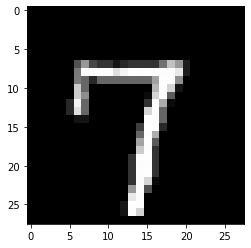

In [12]:
img = data_x.iloc[6].values.reshape((28,28))
plt.imshow(img,cmap='gray')

In [13]:
set(data_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [14]:
X_train, X_val, y_train, y_val = train_test_split(data_x, data_y, test_size = 0.1, random_state=42)

### Model Building

In [15]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

In [17]:
model.compile(optimizer='adam', #'adam' is just another variant of SGD
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model training

In [18]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
591/591 [==============================] - 2s 2ms/step - loss: 1.6381 - accuracy: 0.8530 - val_loss: 0.4874 - val_accuracy: 0.9038
Epoch 2/5
591/591 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.9281 - val_loss: 0.3387 - val_accuracy: 0.9255
Epoch 3/5
591/591 [==============================] - 1s 2ms/step - loss: 0.1975 - accuracy: 0.9492 - val_loss: 0.2664 - val_accuracy: 0.9436
Epoch 4/5
591/591 [==============================] - 1s 2ms/step - loss: 0.1660 - accuracy: 0.9564 - val_loss: 0.2392 - val_accuracy: 0.9507
Epoch 5/5
591/591 [==============================] - 1s 2ms/step - loss: 0.1441 - accuracy: 0.9611 - val_loss: 0.2685 - val_accuracy: 0.9426


### Model evaluation

In [19]:
model.predict(X_test).argmax(axis=1)

875/875 [==============================] - 1s 620us/step


array([2, 0, 9, ..., 3, 9, 2])

875/875 [==============================] - 1s 640us/step
The predicted label is: 0


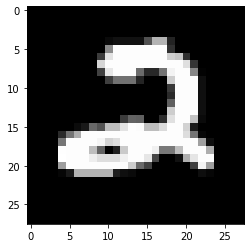

In [21]:
img = X_test.iloc[0].values.reshape((28,28))
plt.imshow(img,cmap='gray')
print("The predicted label is:" ,model.predict(X_test).argmax(axis=1)[1])

Further ahead: You can try increasing the model layers and play with the hyperparameters to increase model's performance